# Instalando e importando bibliotecas

**Esta seção trata da configuração das ferramentas necessárias para nossa análise e construção de modelos.**

Esta linha usa o `!pip installcomando`, que permite executar comandos shell diretamente em um notebook Jupyter.

Ele instala diversas bibliotecas Python comumente usadas em ciência de dados e aprendizado de máquina:

`imbalanced-learn:` Fornece ferramentas para lidar com conjuntos de dados desbalanceados, como SMOTE.
lightgbm: Uma estrutura de reforço de gradiente.

`pandas:` Usado para manipulação e análise de dados, particularmente com dataframes.

`numpy:` Usado para operações numéricas, especialmente com matrizes.

`matplotlib:` Uma biblioteca de plotagem para criar visualizações.

`seaborn:` Outra biblioteca de plotagem, construída sobre `matplotlib`, fornecendo uma interface de alto nível para desenhar gráficos estatísticos atraentes.

`scikit-learn``: Uma biblioteca abrangente para algoritmos de aprendizado de máquina, pré-processamento, seleção de modelos e avaliação.

**Essas linhas importam módulos e classes específicos das bibliotecas instaladas.**

import pandas as pd: Importa a biblioteca pandas e atribui a ela o alias pd.

import numpy as np: Importa a biblioteca numpy e atribui a ela o alias np.

import matplotlib.pyplot as plt: Importa o módulo pyplot do matplotlib e atribui a ele o alias plt. Isso é para plotagem básica.

import seaborn as sns: Importa a biblioteca Seaborn e atribui a ela o alias sns. Isso é para gráficos estatísticos aprimorados.

De sklearn.model_selection, ele importa train_test_split(para dividir dados em conjuntos de treinamento e teste), RandomizedSearchCV(para ajuste de hiperparâmetros) e learning_curve(para gerar curvas de aprendizado).

De sklearn.preprocessing, ele importa OneHotEncoder(para lidar com recursos categóricos) e StandardScaler(para padronizar recursos numéricos).

De sklearn.compose, ele importa ColumnTransformer(para aplicar diferentes transformações a diferentes colunas).

De sklearn.metrics, ele importa várias funções para avaliar modelos de classificação: classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, e auc.

De lightgbm, ele importa LGBMClassifier, o modelo de classificação Light Gradient Boosting Machine.
De imblearn.over_sampling, ele importa SMOTE, uma técnica para superamostragem da classe minoritária em um conjunto de dados desequilibrado.

De imblearn.pipeline, ele importa Pipelinee renomeia para ImbPipelineevitar conflitos de nomenclatura com o Pipeline. Este pipeline foi projetado para funcionar corretamente com imblearntécnicas como SMOTE.

In [ ]:
# --- 0. Instalação e Importação das Bibliotecas ---
# Descomente a linha abaixo se as bibliotecas não estiverem instaladas
!pip install imbalanced-learn lightgbm pandas numpy matplotlib seaborn scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Modelagem e Pré-processamento
from sklearn.model_selection import train_test_split, RandomizedSearchCV, learning_curve
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import (classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, auc)
from lightgbm import LGBMClassifier

# Bibliotecas para balanceamento
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline # Pipeline que suporta o SMOTE

# 1. Configurações e carregamento de dados

Esta seção configura o pandas e o matplotlib para melhor exibição e visualização e, em seguida, carrega o conjunto de dados.

pd.set_option('display.max_columns', None): Esta linha informa ao pandas para exibir todas as colunas de um dataframe, em vez de truncá-las ao imprimir no console.

plt.style.use('seaborn-v0_8-whitegrid'): Isso define o estilo de plotagem para matplotlib para um estilo fornecido pela seaborn, dando aos gráficos uma aparência mais limpa, baseada em grade.

O try...except FileNotFoundErrorbloco tenta carregar um arquivo CSV chamado dados_tratados_combinados.csvem um dataframe pandas chamado df.

Se o arquivo for encontrado e carregado com sucesso, uma mensagem de sucesso será impressa.

Se o arquivo não for encontrado, um FileNotFoundErroré capturado, uma mensagem de erro é impressa e o programa sai usando exit().


In [ ]:


# --- 1. Configurações e Carregamento dos Dados ---
pd.set_option('display.max_columns', None)
# Usando um estilo de gráfico mais sóbrio
plt.style.use('seaborn-v0_8-whitegrid')

# NOTA: O arquivo foi ajustado para 'dados_tratados_combinados.csv'.
# Altere se o nome do seu arquivo for 'dados_tratados_combinados (2).csv'.
try:
    df = pd.read_csv('dados_tratados_combinados.csv')
    print("Arquivo 'dados_tratados_combinados.csv' carregado com sucesso.")
except FileNotFoundError:
    print("Erro: Arquivo 'dados_tratados_combinados.csv' não encontrado.")
    exit()

# 2. Definindo a variável alvo: Satisfação profissional

Aqui, o código identifica e prepara a variável de destino para a tarefa de classificação.

target_col_original = 'você_está_satisfeito_na_sua_empresa_atual?': Define uma variável target_col_originalque contém o nome da coluna original que contém as informações de satisfação.

target_col_final = 'target_satisfeito': Define uma variável target_col_finalpara o novo nome da coluna de destino.

df.dropna(subset=[target_col_original], inplace=True): Esta linha remove linhas do dataframe onde o valor na target_col_originalcoluna está faltando (NaN). inplace=Truemodifica o dataframe diretamente.

df[target_col_final] = df[target_col_original].astype(int): Isso cria uma nova coluna target_satisfeitoconvertendo os valores da coluna de destino original em números inteiros. Isso implica que a coluna original provavelmente contém valores que podem ser interpretados como 0 e 1 (ou representações numéricas semelhantes de satisfação).

O código então imprime a distribuição dos valores na nova target_satisfeitocoluna, normalizada para mostrar a proporção de cada classe (satisfeito vs. insatisfeito). Isso ajuda a entender o equilíbrio entre as classes.

In [ ]:

# --- 2. Definição da Variável Alvo: Satisfação Profissional ---
target_col_original = 'você_está_satisfeito_na_sua_empresa_atual?'
target_col_final = 'target_satisfeito'
df.dropna(subset=[target_col_original], inplace=True)
df[target_col_final] = df[target_col_original].astype(int)
print("\nDistribuição da variável alvo (Satisfação):")
print(df[target_col_final].value_counts(normalize=True))



# 3. Engenharia e Seleção de Recursos


**Esta seção prepara os recursos de entrada para o modelo identificando colunas categóricas e numéricas, executando alguma engenharia básica de recursos e manipulando valores ausentes.**

categorical_features: Uma lista é criada contendo os nomes das colunas identificadas como recursos categóricos.

experience_col: O nome da coluna que representa anos de experiência é armazenado.

exp_map:Um dicionário é definido para mapear as descrições de texto dos níveis de experiência para aproximações numéricas em anos.

df['experiencia_anos'] = df[experience_col].map(exp_map).fillna(0): Um novo recurso numérico experiencia_anosé criado aplicando-se o exp_mapao experience_col. .map()substitui os valores de texto pelos seus valores numéricos correspondentes do dicionário..fillna(0)substitui quaisquer valores que não puderam ser mapeados (ou que estavam originalmente ausentes) por 0.
motivos_features: É definida uma lista de nomes de colunas que representam motivos para potencial insatisfação.

numeric_features: Esta lista é criada combinando o novo experiencia_anosrecurso desenvolvido com o motivos_features.

O forloop itera pela numeric_featureslista. Para cada nome de coluna existente no dataframe, ele tenta convertê-la para um tipo numérico usando pd.to_numeric. errors='coerce'Transformará quaisquer valores que não possam ser convertidos em números em NaN. Esses NaNvalores são então preenchidos com 0 usando .fillna(0).

final_cat_featurese final_num_features: Essas linhas criam novas listas contendo apenas os nomes de recursos categóricos e numéricos que estão realmente presentes no dataframe. Isso é uma proteção caso algumas colunas esperadas estejam ausentes.

final_features_list: Isso combina as listas validadas de nomes de recursos categóricos e numéricos em uma única lista que representa todos os recursos a serem usados ​​no modelo.


Os recursos selecionados são então impressos.

In [ ]:
# --- 3. Engenharia e Seleção de Features ---
categorical_features = [
    'nivel', 'faixa_salarial', 'setor', 'numero_de_funcionarios',
    'atualmente_qual_a_sua_forma_de_trabalho?'
]
experience_col = 'quanto_tempo_de_experiência_na_área_de_dados_você_tem?'
exp_map = {
    'Não tenho experiência na área de dados': 0, 'Menos de 1 ano': 0.5, 'de 1 a 2 anos': 1.5,
    'de 3 a 4 anos': 3.5, 'de 5 a 6 anos': 5.5, 'de 7 a 10 anos': 8.5, 'Mais de 10 anos': 12
}
df['experiencia_anos'] = df[experience_col].map(exp_map).fillna(0)
motivos_features = [
    'falta_de_oportunidade_de_crescimento_no_emprego_atual',
    'salário_atual_não_corresponde_ao_mercado',
    'não_tenho_uma_boa_relação_com_meu_líder_gestor',
    'gostaria_de_receber_mais_benefícios',
    'o_clima_de_trabalho_ambiente_não_é_bom',
    'falta_de_maturidade_analítica_na_empresa'
]
numeric_features = ['experiencia_anos'] + motivos_features
for col in numeric_features:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)
final_cat_features = [col for col in categorical_features if col in df.columns]
final_num_features = [col for col in numeric_features if col in df.columns]
final_features_list = final_cat_features + final_num_features
print("\nFeatures selecionadas para o modelo:", final_features_list)


4. Pré-processamento e Pipeline

Esta seção configura as transformações de dados e cria um pipeline que combina as etapas de pré-processamento com o modelo.

O primeiro forloop itera por final_cat_featurese preenche quaisquer valores ausentes restantes ( NaN) nessas colunas com a string "Não Informado". Isso é feito antes da codificação one-hot.

preprocessor = ColumnTransformer(...): Isso cria um ColumnTransformerobjeto. Este objeto é usado para aplicar diferentes etapas de pré-processamento a diferentes colunas.

transformers: Esta lista define as transformações.

('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), final_cat_features): Isso se aplica OneHotEncoderao final_cat_features. A codificação one-hot converte variáveis ​​categóricas em um formato que pode ser usado em aprendizado de máquina. handle_unknown='ignore'significa que, se o codificador encontrar uma categoria no conjunto de teste que não viu no conjunto de treinamento, ele a ignorará em vez de gerar um erro.
drop='first'descarta a primeira coluna de categoria para cada recurso para evitar multicolinearidade.

('num', StandardScaler(), final_num_features): Isto se aplica StandardScaleràs final_num_featuresescalas de padronização que exigem que os recursos numéricos tenham uma média de 0 e um desvio padrão de 1.

remainder='drop': Quaisquer colunas no quadro de dados de entrada que não estejam especificadas na transformerslista serão descartadas.

X = df[final_features_list]: As colunas de recursos ( final_features_list) são selecionadas do dataframe e atribuídas a X.

y = df[target_col_final]: A coluna de destino ( target_col_final) é selecionada e atribuída a y.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42): Os dados são divididos em conjuntos de treinamento e teste. 30% dos dados são alocados ao conjunto de teste ( test_size=0.3).

stratify=ygarante que a proporção das classes de destino seja a mesma nos conjuntos de treinamento e teste, o que é crucial para conjuntos de dados desbalanceados. random_state=42garante que a divisão seja reproduzível.
pipeline = ImbPipeline(...): Um ImbPipelineobjeto é criado.

*Um pipeline encadeia várias etapas de processamento.*

**Quando fité chamado no pipeline, cada etapa é aplicada sequencialmente aos dados. Quando predictou transformé chamado, as etapas também são aplicadas sequencialmente.
steps:**

Esta lista define as etapas do pipeline.


('preprocessor', preprocessor):O primeiro passo é o que preprocessordefinimos anteriormente, que lida com a codificação de recursos categóricos e o dimensionamento de recursos numéricos.

('smote', SMOTE(random_state=42)): A segunda etapa é aplicar o SMOTE aos dados de treinamento. O SMOTE é uma técnica de sobreamostragem que sintetiza novos exemplos para a classe minoritária, random_state=42o que torna o processo SMOTE reproduzível. Observe que o SMOTE é aplicado após as etapas de pré-processamento neste pipeline e é aplicado apenas durante a fitetapa nos dados de treinamento.

('classifier', LGBMClassifier(random_state=42, n_jobs=-1)): A etapa final é o classificador LightGBM. random_state=42garante a reprodutibilidade do treinamento do modelo. n_jobs=-1informa ao LightGBM para usar todos os núcleos de CPU disponíveis.

In [ ]:

# --- 4. Pré-processamento e Pipeline ---
for col in final_cat_features:
    df[col] = df[col].fillna('Não Informado')
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), final_cat_features),
        ('num', StandardScaler(), final_num_features)
    ],
    remainder='drop'
)
X = df[final_features_list]
y = df[target_col_final]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LGBMClassifier(random_state=42, n_jobs=-1))
])


# 5. Treinamento e otimização do modelo

**Esta seção treina o modelo LightGBM dentro do pipeline e usa pesquisa aleatória para encontrar os melhores hiperparâmetros.**

print("\nIniciando treinamento..."): Imprime uma mensagem indicando o início do processo de treinamento.

params = {...}: Este dicionário define a grade de hiperparâmetros para LGBMClassifiero pipeline. As chaves usam um sublinhado duplo ( __) para especificar a qual etapa do pipeline ( 'classifier') o parâmetro pertence. Os valores são listas de valores possíveis para cada hiperparâmetro.

n_estimators: O número de rodadas de reforço.

learning_rate: A redução do tamanho do passo usada na atualização para evitar overfitting.

num_leaves: O número máximo de folhas em uma árvore.

max_depth: A profundidade máxima da árvore para alunos básicos.

reg_alpha: Termo de regularização L1 em ​​pesos.

reg_lambda: Termo de regularização L2 em pesos.

search = RandomizedSearchCV(...): Isso cria um RandomizedSearchCVobjeto.

pipeline: O pipeline (incluindo pré-processador, SMOTE e classificador) é fornecido como o estimador a ser ajustado.

params: O dicionário de hiperparâmetros para amostragem.

n_iter=30: O número de configurações de parâmetros amostradas. Um número maior amostra mais combinações e pode levar a melhores resultados, mas leva mais tempo.
cv=5: O número de dobras de validação cruzada a serem usadas durante a busca. Os dados de treinamento são divididos em 5 partes, e o modelo é treinado 5 vezes, cada vez usando uma parte diferente como conjunto de validação e as 4 restantes como dados de treinamento.

scoring='f1_macro': A métrica usada para avaliar os modelos durante a busca. 'f1_macro' calcula a pontuação F1 para cada classe e obtém a média não ponderada. Isso é útil para conjuntos de dados desbalanceados.

verbose=1: Controla a verbosidade da saída durante o processo de pesquisa.

n_jobs=-1: Usa todos os núcleos de CPU disponíveis para processamento paralelo durante a pesquisa.

random_state=42: Garante que a aleatoriedade na pesquisa seja reproduzível.
search.fit(X_train, y_train): Isso inicia o processo de busca aleatória. A busca ajusta o pipeline (incluindo pré-processamento e SMOTE) com diferentes combinações de hiperparâmetros nos dados X_traine y_train, avaliando cada combinação por meio de validação cruzada.

best_model = search.best_estimator_: Após a conclusão da pesquisa, esta linha recupera o pipeline (o best_estimator_) que apresentou o melhor desempenho com base na métrica de pontuação escolhida ( f1_macro) durante a validação cruzada.
 Este best_modelé o modelo otimizado pronto para avaliação.


In [ ]:

# --- 5. Treinamento e Otimização do Modelo ---
print("\nIniciando treinamento com LightGBM, SMOTE e busca de hiperparâmetros...")
params = {
    'classifier__n_estimators': [100, 200, 400],
    'classifier__learning_rate': [0.02, 0.05, 0.1],
    'classifier__num_leaves': [31, 40, 50],
    'classifier__max_depth': [7, 10, 15],
    'classifier__reg_alpha': [0.1, 0.5],
    'classifier__reg_lambda': [0.1, 0.5]
}
search = RandomizedSearchCV(
    pipeline, params, n_iter=30, cv=5,
    scoring='f1_macro', verbose=1, n_jobs=-1, random_state=42
)
search.fit(X_train, y_train)
best_model = search.best_estimator_


# 6. Avaliando e visualizando resultados
y_pred_train = best_model.predict(X_train): Usa o best_modelpara fazer previsões de classe binária (0 ou 1) nos recursos de treinamento X_train.
y_proba_train = best_model.predict_proba(X_train)[:, 1]: Usa o best_modelpara prever a probabilidade da classe positiva (classe 1) para os recursos de treinamento. [:, 1]seleciona as probabilidades para a segunda classe (que normalmente é a classe positiva).
y_pred_test = best_model.predict(X_test): Faz previsões de classe binária nos recursos de teste X_test.
y_proba_test = best_model.predict_proba(X_test)[:, 1]: Prevê a probabilidade da classe positiva para os recursos de teste.

Imprime um título para a avaliação comparativa.

print(search.best_params_): Imprime os melhores valores de hiperparâmetros
 encontrados pelo RandomizedSearchCV.
Imprime um título para o relatório de classificação de treinamento.
print(f"AUC-ROC no Treino: {roc_auc_score(y_train, y_proba_train):.3f}"): Calcula e imprime a pontuação AUC-ROC para o conjunto de treinamento. A AUC-ROC mede a capacidade do modelo de distinguir entre as classes com base nas probabilidades previstas. Uma pontuação de 1 é perfeita, 0,5 é aleatória.
print(classification_report(y_train, y_pred_train, target_names=['Insatisfeito', 'Satisfeito'])): Gera e imprime um relatório de classificação para o conjunto de treinamento. Este relatório inclui precisão, recall, pontuação F1 e suporte para cada classe, bem como a exatidão geral. target_namesAtribui rótulos significativos às classes.
Imprime um título para o relatório de classificação do teste.
print(f"AUC-ROC no Teste: {roc_auc_score(y_test, y_proba_test):.3f}"): Calcula e imprime a pontuação AUC-ROC para o conjunto de teste. Essa pontuação é um indicador mais preciso do desempenho de generalização do modelo.
print(classification_report(y_test, y_pred_test, target_names=['Insatisfeito', 'Satisfeito'])): Gera e imprime um relatório de classificação para o conjunto de teste. A avaliação no conjunto de teste fornece uma estimativa imparcial do desempenho do modelo em dados não visualizados.

## 6.1 Matrizes de Confusão Comparativas (Treinamento vs. Teste)

Esta parte gera e exibe matrizes de confusão para os conjuntos de treinamento e teste, permitindo uma comparação visual do desempenho.

fig, axes = plt.subplots(1, 2, figsize=(16, 7)): Cria uma figura e um conjunto de subplots. 1, 2significa uma linha e duas colunas de subplots. figsize=(16, 7)define o tamanho da figura. axesé uma matriz que contém os dois eixos do subplot.
fig.suptitle('Matrizes de Confusão Comparativas', fontsize=16): Define um título principal para a figura inteira.
ConfusionMatrixDisplay.from_estimator(...): Esta função do scikit-learn plota diretamente uma matriz de confusão usando o best_model, os recursos de entrada ( X_trainou X_test) e os rótulos verdadeiros ( y_trainou y_test).
cmap='Greens'e cmap='Blues': Define o mapa de cores para as matrizes.
ax=axes[0]e ax=axes[1]: Especifica em qual eixo de subplot a matriz será plotada.
display_labels=['Insatisfeito', 'Satisfeito']: Fornece rótulos personalizados para as classes na matriz.
axes[0].set_title('Conjunto de Treino')e axes[1].set_title('Conjunto de Teste'): Define o título para cada subtrama individual.
plt.tight_layout(rect=[0, 0.03, 1, 0.95]): Ajusta o espaçamento entre subplots e as bordas das figuras para evitar que títulos ou rótulos se sobreponham, deixando algum espaço na parte superior para o supertítulo.
plt.show(): Exibe o gráfico gerado.


## 6.2 Curva de Aprendizagem


Esta seção gera e plota uma curva de aprendizado, que ajuda a diagnosticar se o modelo está sofrendo de alta variância (overfitting) ou alto viés (underfitting).
Imprime um título para a seção da curva de aprendizado.
train_sizes, train_scores, test_scores = learning_curve(...): Esta função do scikit-learn calcula pontuações para diferentes tamanhos de conjuntos de treinamento.
estimator=best_model: O modelo a ser avaliado.
X=X, y=y: O conjunto de dados completo apresenta os recursos e o destino. A learning_curvefunção dividirá esses dados internamente.
cv=5: O número de dobras de validação cruzada.
n_jobs=-1: Usa todos os núcleos da CPU.
train_sizes=np.linspace(0.1, 1.0, 10): Especifica os tamanhos dos subconjuntos de treinamento a serem usados, de 10% a 100% dos dados de treinamento completos, em 10 etapas uniformemente espaçadas.
scoring='f1_macro': A métrica usada para avaliar o desempenho do modelo em cada tamanho de treinamento.
A função retorna três matrizes: train_sizes(os tamanhos reais dos conjuntos de treinamento), train_scores(as pontuações nos subconjuntos de treinamento) e test_scores(as pontuações nos conjuntos de validação correspondentes).
train_scores_mean, train_scores_std, test_scores_mean, test_scores_std: Calcula a média e o desvio padrão das pontuações de treinamento e teste nas dobras de validação cruzada para cada tamanho de treinamento. O desvio padrão fornece uma medida da variância nas pontuações.
plt.figure(figsize=(12, 7)): Cria uma nova figura para o gráfico.
Define o título e os rótulos dos eixos para o gráfico.
plt.plot(...): Plota as pontuações médias de treinamento e validação em relação ao tamanho do conjunto de treinamento.
o-: Adiciona marcadores e os conecta com linhas.
color: Define a cor da linha.
label: Fornece um rótulo para a legenda.
plt.fill_between(...): Sombreia a área entre a pontuação média mais/menos um desvio padrão. Isso mostra a variabilidade das pontuações entre as dobras de validação cruzada.
plt.legend(loc="best"): Exibe a legenda na melhor posição para evitar sobreposição com as linhas do gráfico.
plt.show(): Exibe o gráfico da curva de aprendizado.
##6.3 Curva ROC comparativa
Esta seção gera e plota a curva ROC (Receiver Operating Characteristic) para os conjuntos de treinamento e teste, que é outra métrica importante para classificadores binários.
Imprime um título para a seção da curva ROC.
fpr_test, tpr_test, _ = roc_curve(y_test, y_proba_test): Calcula a Taxa de Falsos Positivos (FPR) e a Taxa de Verdadeiros Positivos (TPR) para diferentes limites de probabilidade no conjunto de teste usando os rótulos verdadeiros ( y_test) e as probabilidades previstas ( y_proba_test). O sublinhado _captura os limites, que não são usados ​​no gráfico.
roc_auc_test = auc(fpr_test, tpr_test): Calcula a área sob a curva ROC (AUC) para o conjunto de teste usando os valores de FPR e TPR calculados.
As mesmas etapas são repetidas para calcular FPR, TPR e AUC para o conjunto de treinamento ( fpr_train, tpr_train, roc_auc_train).
Cria uma nova figura para o gráfico e define o título.
plt.plot(...): Plota a curva ROC para os conjuntos de treinamento e teste. O eixo x é FPR e o eixo y é TPR.
lw=2: Define a largura da linha.
linestyle='--': Define o estilo de linha da curva de treinamento como tracejada.
label=f'...': Cria rótulos para a legenda que incluem a pontuação AUC calculada, formatada com 3 casas decimais.
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle=':', label='Classificador Aleatório'): Traça uma linha tracejada diagonal de (0,0) a (1,1). Isso representa a curva ROC de um classificador aleatório, que tem uma AUC de 0,5. Serve como linha de base.
plt.xlim([0.0, 1.0])e plt.ylim([0.0, 1.05]): define os limites para os eixos x e y para garantir que o gráfico cubra o intervalo relevante.
Define os rótulos para os eixos x e y.
plt.legend(loc="lower right", fontsize=11): Exibe a legenda no canto inferior direito.
plt.show(): Exibe o gráfico da curva ROC.
##7. Importância do recurso
Esta seção final tenta extrair e visualizar a importância dos recursos usados ​​pelo modelo LightGBM treinado.

Arquivo 'dados_tratados_combinados.csv' carregado com sucesso.

Distribuição da variável alvo (Satisfação):
target_satisfeito
1    0.719546
0    0.280454
Name: proportion, dtype: float64

Features selecionadas para o modelo: ['nivel', 'faixa_salarial', 'setor', 'numero_de_funcionarios', 'atualmente_qual_a_sua_forma_de_trabalho?', 'experiencia_anos', 'falta_de_oportunidade_de_crescimento_no_emprego_atual', 'salário_atual_não_corresponde_ao_mercado', 'não_tenho_uma_boa_relação_com_meu_líder_gestor', 'gostaria_de_receber_mais_benefícios', 'o_clima_de_trabalho_ambiente_não_é_bom', 'falta_de_maturidade_analítica_na_empresa']

Iniciando treinamento com LightGBM, SMOTE e busca de hiperparâmetros...
Fitting 5 folds for each of 30 candidates, totalling 150 fits


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 2394, number of negative: 2394
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002224 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3730
[LightGBM] [Info] Number of data points in the train set: 4788, number of used features: 52
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



AVALIAÇÃO COMPARATIVA: TREINO VS. TESTE

Melhores parâmetros encontrados:
{'classifier__reg_lambda': 0.1, 'classifier__reg_alpha': 0.1, 'classifier__num_leaves': 31, 'classifier__n_estimators': 100, 'classifier__max_depth': 7, 'classifier__learning_rate': 0.05}

--- Relatório de Classificação (TREINO) ---
AUC-ROC no Treino: 0.982
              precision    recall  f1-score   support

Insatisfeito       1.00      0.90      0.95       933
  Satisfeito       0.96      1.00      0.98      2394

    accuracy                           0.97      3327
   macro avg       0.98      0.95      0.97      3327
weighted avg       0.97      0.97      0.97      3327


--- Relatório de Classificação (TESTE) ---
AUC-ROC no Teste: 0.955
              precision    recall  f1-score   support

Insatisfeito       1.00      0.87      0.93       400
  Satisfeito       0.95      1.00      0.98      1026

    accuracy                           0.96      1426
   macro avg       0.98      0.94      0.95      1426


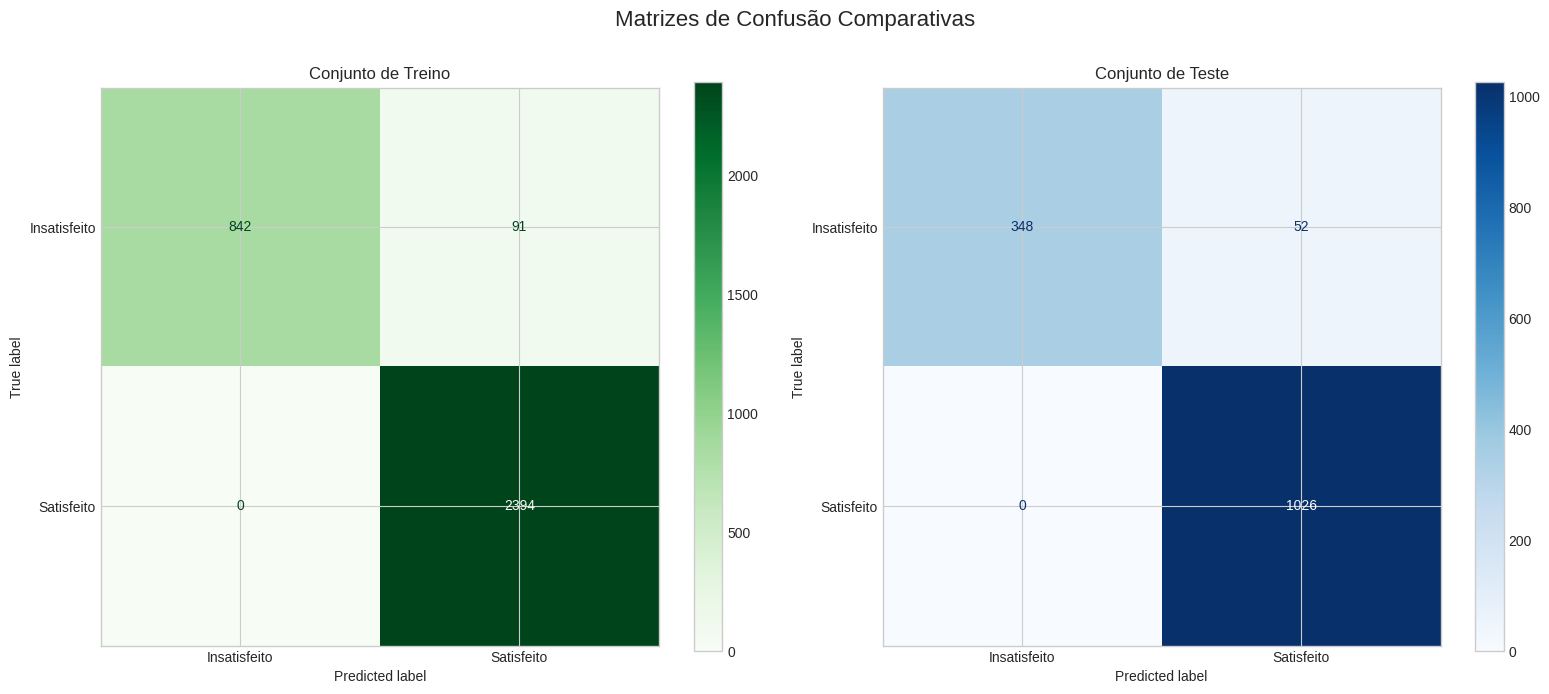


GERANDO CURVA DE APRENDIZAGEM


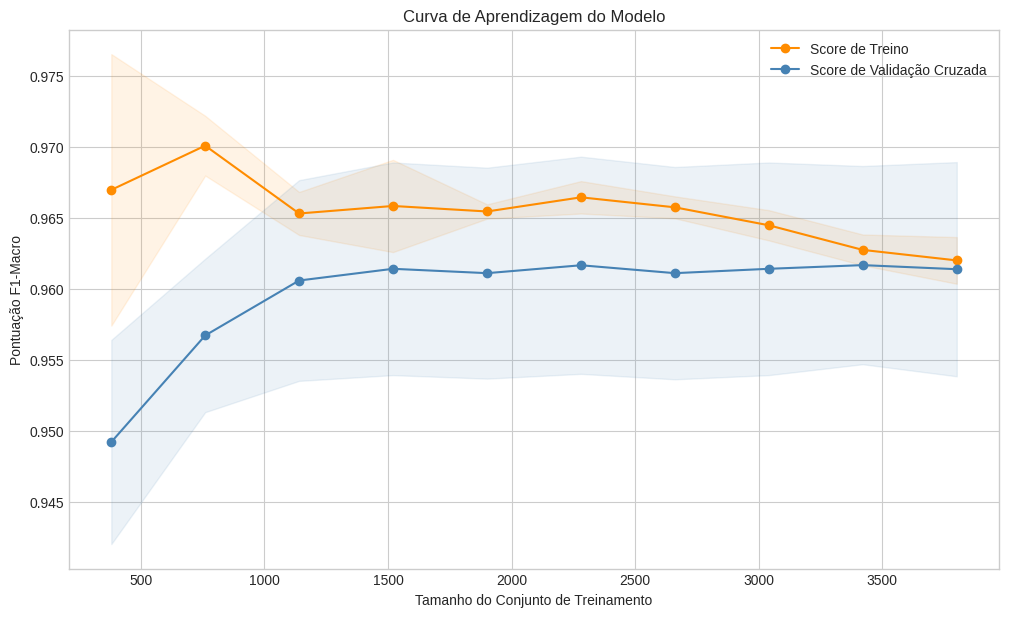


GERANDO CURVA ROC COMPARATIVA


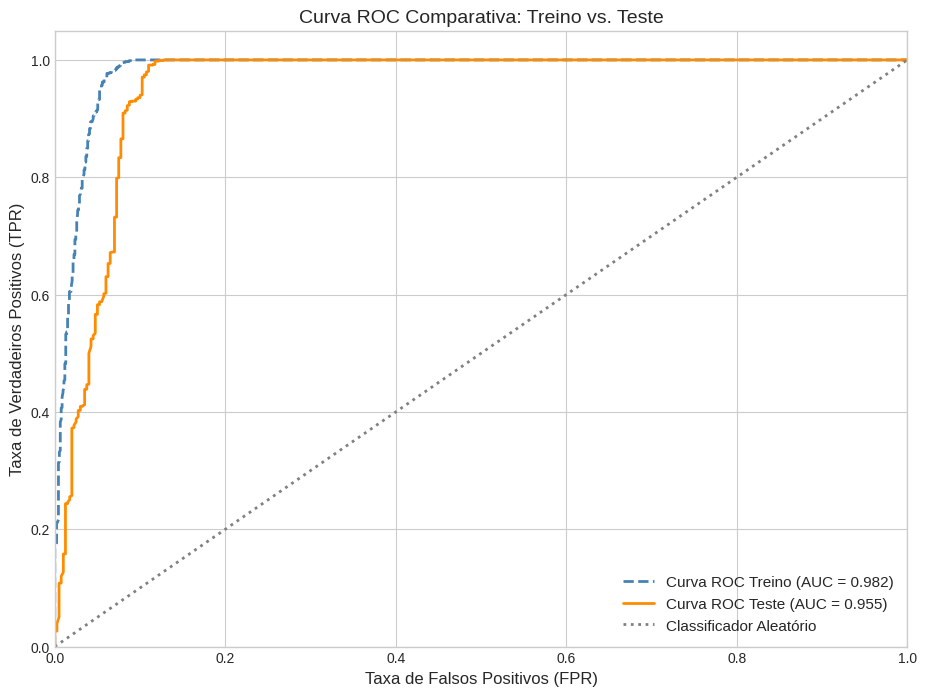


GERANDO GRÁFICO DE IMPORTÂNCIA DAS FEATURES


<ipython-input-1-840109835>:220: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importances.head(20), x='Importance', y='Feature', palette='cividis')


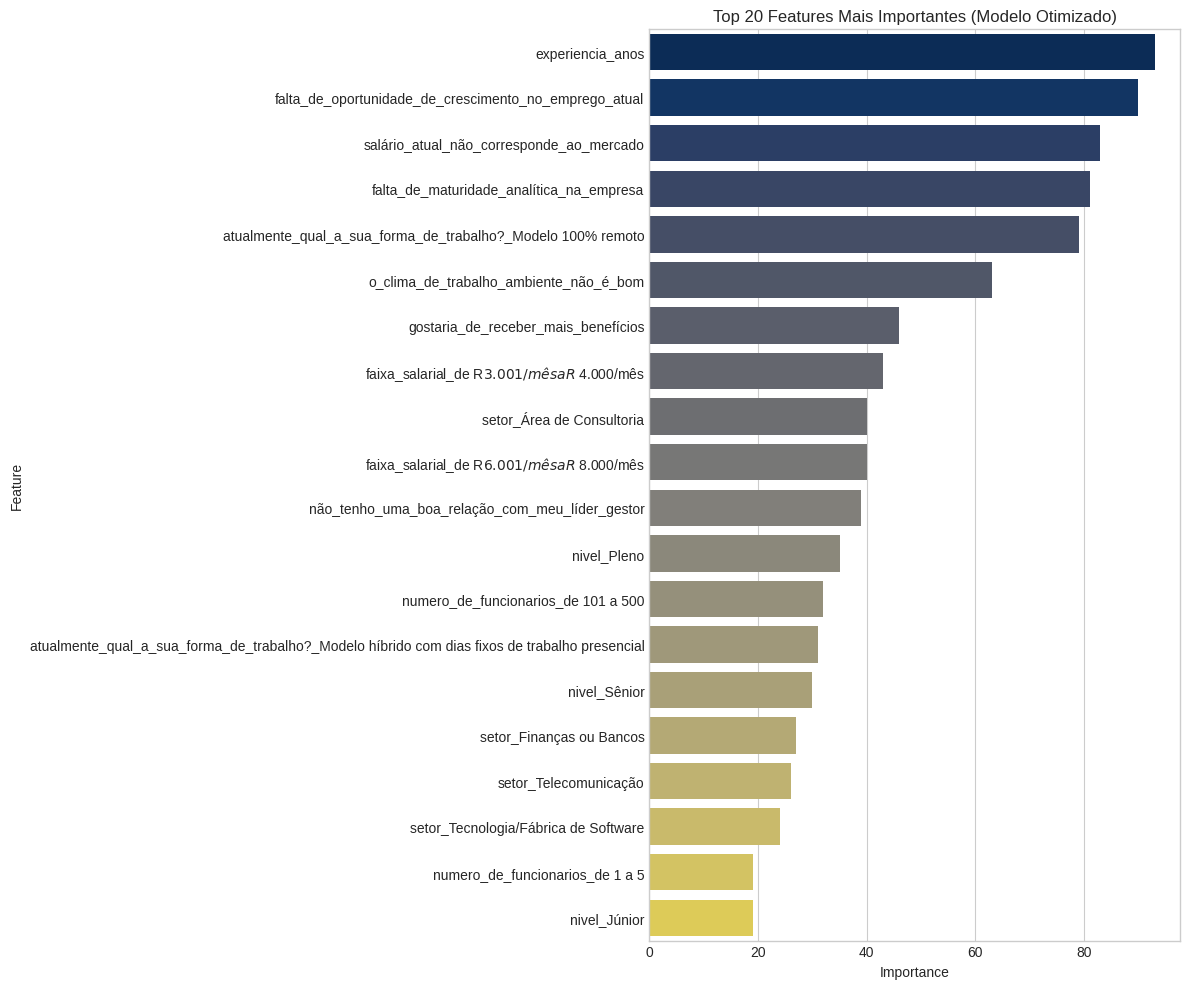

In [1]:



# --- 6. Avaliação e Visualização dos Resultados ---

# Predições para ambos os conjuntos
y_pred_train = best_model.predict(X_train)
y_proba_train = best_model.predict_proba(X_train)[:, 1]
y_pred_test = best_model.predict(X_test)
y_proba_test = best_model.predict_proba(X_test)[:, 1]

print("\n" + "="*60)
print("AVALIAÇÃO COMPARATIVA: TREINO VS. TESTE")
print("="*60)
print("\nMelhores parâmetros encontrados:")
print(search.best_params_)

# Relatórios de Classificação
print("\n--- Relatório de Classificação (TREINO) ---")
print(f"AUC-ROC no Treino: {roc_auc_score(y_train, y_proba_train):.3f}")
print(classification_report(y_train, y_pred_train, target_names=['Insatisfeito', 'Satisfeito']))

print("\n--- Relatório de Classificação (TESTE) ---")
print(f"AUC-ROC no Teste: {roc_auc_score(y_test, y_proba_test):.3f}")
print(classification_report(y_test, y_pred_test, target_names=['Insatisfeito', 'Satisfeito']))


# --- 6.1 Matrizes de Confusão Comparativas (Treino vs. Teste) ---
# Criando uma figura com dois subplots, lado a lado
fig, axes = plt.subplots(1, 2, figsize=(16, 7))
fig.suptitle('Matrizes de Confusão Comparativas', fontsize=16)

# Matriz de Confusão (Treino)
ConfusionMatrixDisplay.from_estimator(best_model, X_train, y_train,
                                      cmap='Greens', ax=axes[0],
                                      display_labels=['Insatisfeito', 'Satisfeito'])
axes[0].set_title('Conjunto de Treino')

# Matriz de Confusão (Teste)
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test,
                                      cmap='Blues', ax=axes[1],
                                      display_labels=['Insatisfeito', 'Satisfeito'])
axes[1].set_title('Conjunto de Teste')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Ajusta o layout para o supertítulo
plt.show()


# --- 6.2 Curva de Aprendizagem ---
print("\n" + "="*60)
print("GERANDO CURVA DE APRENDIZAGEM")
print("="*60)
train_sizes, train_scores, test_scores = learning_curve(
    estimator=best_model, X=X, y=y, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), scoring='f1_macro'
)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(12, 7))
plt.title("Curva de Aprendizagem do Modelo")
plt.xlabel("Tamanho do Conjunto de Treinamento")
plt.ylabel("Pontuação F1-Macro")
# Usando cores mais sóbrias
plt.plot(train_sizes, train_scores_mean, 'o-', color="darkorange", label="Score de Treino")
plt.plot(train_sizes, test_scores_mean, 'o-', color="steelblue", label="Score de Validação Cruzada")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="darkorange")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="steelblue")
plt.legend(loc="best")
plt.show()


# --- 6.3 Curva ROC Comparativa ---
print("\n" + "="*60)
print("GERANDO CURVA ROC COMPARATIVA")
print("="*60)
fpr_test, tpr_test, _ = roc_curve(y_test, y_proba_test)
roc_auc_test = auc(fpr_test, tpr_test)
fpr_train, tpr_train, _ = roc_curve(y_train, y_proba_train)
roc_auc_train = auc(fpr_train, tpr_train)

plt.figure(figsize=(11, 8))
plt.title('Curva ROC Comparativa: Treino vs. Teste', fontsize=14)
# Usando cores mais sóbrias
plt.plot(fpr_train, tpr_train, color='steelblue', lw=2, linestyle='--', label=f'Curva ROC Treino (AUC = {roc_auc_train:.3f})')
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'Curva ROC Teste (AUC = {roc_auc_test:.3f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle=':', label='Classificador Aleatório')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)', fontsize=12)
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)', fontsize=12)
plt.legend(loc="lower right", fontsize=11)
plt.show()


# --- 7. Importância das Features ---
print("\n" + "="*60)
print("GERANDO GRÁFICO DE IMPORTÂNCIA DAS FEATURES")
print("="*60)
try:
    cat_features_out = best_model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(final_cat_features)
    all_feature_names = np.concatenate([cat_features_out, final_num_features])
    importances = best_model.named_steps['classifier'].feature_importances_
    feature_importances = pd.DataFrame({'Feature': all_feature_names, 'Importance': importances}).sort_values('Importance', ascending=False)

    plt.figure(figsize=(12, 10))
    # Usando uma paleta de cores mais sóbria (cividis)
    sns.barplot(data=feature_importances.head(20), x='Importance', y='Feature', palette='cividis')
    plt.title('Top 20 Features Mais Importantes (Modelo Otimizado)')
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"\nNão foi possível gerar o gráfico de importância de features: {e}")